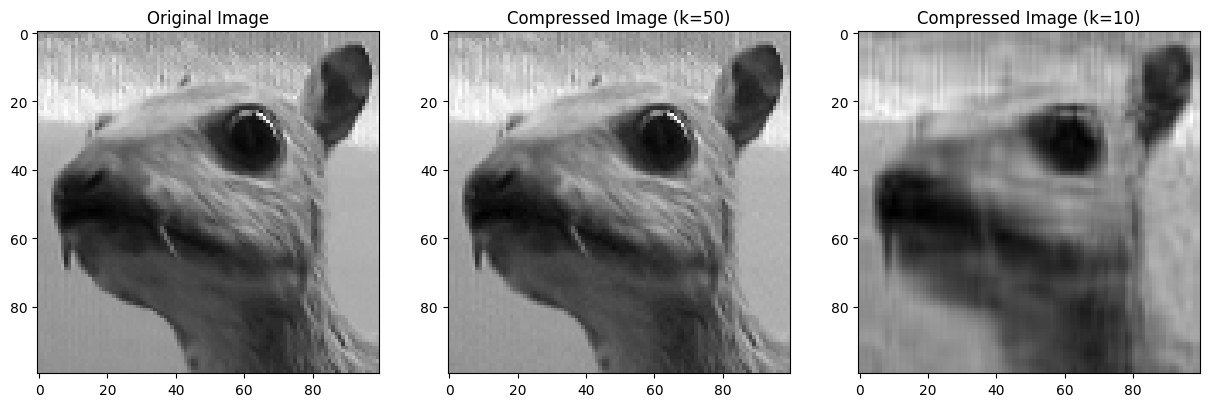

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Load a grayscale image
image_url = "https://upload.wikimedia.org/wikipedia/commons/5/50/Vd-Orig.png" # Sample image
image = io.imread(image_url, as_gray=True)

# Compute SVD
U, S, VT = np.linalg.svd(image, full_matrices=False)

# Function to reconstruct image with top k singular values
def compress_image(k):
    Sigma_k = np.diag(S[:k])  # Keep top k singular values
    compressed_image = U[:, :k] @ Sigma_k @ VT[:k, :]
    return compressed_image

# Plot original and compressed images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")

# Compress using different values of k
for i, k in enumerate([50, 10]):
    compressed_img = compress_image(k)
    axes[i + 1].imshow(compressed_img, cmap="gray")
    axes[i + 1].set_title(f"Compressed Image (k={k})")

plt.show()
